In [1]:
!pip install neuralprophet

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [3]:
# Disable logging messages unless there is an error
set_log_level("ERROR")

In [4]:
# read in data
url = "https://github.com/jlomako/hospital-occupancy-tracker/raw/main/tables/occupancy.csv"
df = pd.read_csv(url)
df.tail()

,Date,CENTRE HOSPITALIER DE L'UNIVERSITÉ DE MONTRÉAL,CENTRE HOSPITALIER DE ST. MARY,CHU SAINTE-JUSTINE,HÔPITAL DE LACHINE,HÔPITAL DE LASALLE,HÔPITAL DE SOINS PSYCHIATRIQUES DE L'EST-DE-MONTRÉAL,HÔPITAL DE VERDUN,HÔPITAL DOUGLAS,HÔPITAL DU SACRÉ-COEUR DE MONTRÉAL,...,HÔPITAL GÉNÉRAL DU LAKESHORE,HÔPITAL GÉNÉRAL JUIF,HÔPITAL JEAN-TALON,HÔPITAL MAISONNEUVE-ROSEMONT,HÔPITAL NOTRE-DAME,HÔPITAL ROYAL VICTORIA,HÔPITAL SANTA CABRINI,INSTITUT DE CARDIOLOGIE DE MONTRÉAL,L'HÔPITAL DE MONTRÉAL POUR ENFANTS,TOTAL MONTRÉAL
10673,2024-05-02T2:45,127.0,95.0,44.0,50.0,80.0,185.0,100.0,100.0,130.0,...,90.0,158.0,68.0,114.0,191.0,105.0,59.0,42.0,142.0,116
10674,2024-05-02T3:45,125.0,105.0,19.0,50.0,87.0,188.0,100.0,104.0,124.0,...,94.0,158.0,73.0,117.0,197.0,108.0,64.0,42.0,125.0,117
10675,2024-05-02T4:45,125.0,105.0,NaN,50.0,87.0,192.0,100.0,107.0,120.0,...,94.0,158.0,77.0,120.0,191.0,113.0,64.0,42.0,125.0,120
10676,2024-05-02T5:45,127.0,100.0,19.0,50.0,87.0,192.0,100.0,113.0,120.0,...,106.0,160.0,82.0,120.0,194.0,113.0,68.0,42.0,100.0,118
10677,2024-05-02T6:46,129.0,118.0,19.0,57.0,87.0,196.0,100.0,117.0,120.0,...,113.0,149.0,82.0,120.0,194.0,NaN,68.0,42.0,83.0,119


In [5]:
# set column names
col_names = ["Date", "Centre Hospitalier de l'Université de Montréal", "Centre Hospitalier de St. Mary",
             "CHU Sainte-Justine", "Hôpital de Lachine", "Hôpital de Lasalle",  "Hôpital de Verdun",
             "Hôpital Douglas", "Hôpital Maisonneuve-Rosemont", "Hôpital du Sacré-Cœur de Montréal",
             "Hôpital en Santé Mentale Albert-Prévost", "Hôpital Fleury", "Hôpital Général de Montréal",
             "Hôpital Général du Lakeshore", "Hôpital Général Juif", "Hôpital Jean-Talon", "Hôpital Notre-Dame",
             "Hôpital Royal Victoria", "Hôpital Santa Cabrini", "Institut de Cardiologie de Montréal",
             "Institut Universitaire en Santé Mentale de Montréal", "Hôpital de Montréal pour Enfants", "Total Montréal"]
# Rename columns
df.columns = col_names
df.tail()

,Date,Centre Hospitalier de l'Université de Montréal,Centre Hospitalier de St. Mary,CHU Sainte-Justine,Hôpital de Lachine,Hôpital de Lasalle,Hôpital de Verdun,Hôpital Douglas,Hôpital Maisonneuve-Rosemont,Hôpital du Sacré-Cœur de Montréal,...,Hôpital Général du Lakeshore,Hôpital Général Juif,Hôpital Jean-Talon,Hôpital Notre-Dame,Hôpital Royal Victoria,Hôpital Santa Cabrini,Institut de Cardiologie de Montréal,Institut Universitaire en Santé Mentale de Montréal,Hôpital de Montréal pour Enfants,Total Montréal
10673,2024-05-02T2:45,127.0,95.0,44.0,50.0,80.0,185.0,100.0,100.0,130.0,...,90.0,158.0,68.0,114.0,191.0,105.0,59.0,42.0,142.0,116
10674,2024-05-02T3:45,125.0,105.0,19.0,50.0,87.0,188.0,100.0,104.0,124.0,...,94.0,158.0,73.0,117.0,197.0,108.0,64.0,42.0,125.0,117
10675,2024-05-02T4:45,125.0,105.0,NaN,50.0,87.0,192.0,100.0,107.0,120.0,...,94.0,158.0,77.0,120.0,191.0,113.0,64.0,42.0,125.0,120
10676,2024-05-02T5:45,127.0,100.0,19.0,50.0,87.0,192.0,100.0,113.0,120.0,...,106.0,160.0,82.0,120.0,194.0,113.0,68.0,42.0,100.0,118
10677,2024-05-02T6:46,129.0,118.0,19.0,57.0,87.0,196.0,100.0,117.0,120.0,...,113.0,149.0,82.0,120.0,194.0,NaN,68.0,42.0,83.0,119


In [35]:
#holidays = pd.read_csv("https://github.com/jlomako/prophet-bot/raw/main/data/quebec.csv")
#holidays.tail(10)

,ds,holiday
22,2023-12-25,Christmas Day
23,2024-01-01,New Year's Day
24,2024-03-29,Good Friday
25,2024-04-01,Easter Monday
26,2024-05-20,National Patriots' Day
27,2024-06-24,Jean Baptiste Day
28,2024-07-01,Canada Day
29,2024-09-02,Labour Day
30,2024-10-14,Thanksgiving
31,2024-12-25,Christmas Day


In [6]:
# create empty df
#df0 = pd.DataFrame(columns = ["name", "Date", "yhat", "yhat_lower", "yhat_upper"])
#df0

,name,Date,yhat,yhat_lower,yhat_upper


In [ ]:
# get hospital names from columns
hospitals = df.columns[1:len(df.columns)]
for hospital in hospitals:
  print(hospital)

Centre Hospitalier de l'Université de Montréal
Centre Hospitalier de St. Mary
CHU Sainte-Justine
Hôpital de Lachine
Hôpital de Lasalle
Hôpital de Verdun
Hôpital Douglas
Hôpital Maisonneuve-Rosemont
Hôpital du Sacré-Cœur de Montréal
Hôpital en Santé Mentale Albert-Prévost
Hôpital Fleury
Hôpital Général de Montréal
Hôpital Général du Lakeshore
Hôpital Général Juif
Hôpital Jean-Talon
Hôpital Notre-Dame
Hôpital Royal Victoria
Hôpital Santa Cabrini
Institut de Cardiologie de Montréal
Institut Universitaire en Santé Mentale de Montréal
Hôpital de Montréal pour Enfants
Total Montréal


In [6]:
# this will be in loop:
hospital = "Hôpital Général Juif"

In [7]:
 # get hourly data for hospital
df_hospital = df[['Date', hospital]]
df_hospital.tail(10)

,Date,Hôpital Général Juif
10668,2024-05-01T21:45,240.0
10669,2024-05-01T22:45,226.0
10670,2024-05-01T23:45,185.0
10671,2024-05-02T0:45,166.0
10672,2024-05-02T1:45,162.0
10673,2024-05-02T2:45,158.0
10674,2024-05-02T3:45,158.0
10675,2024-05-02T4:45,158.0
10676,2024-05-02T5:45,160.0
10677,2024-05-02T6:46,149.0


In [8]:
# rename columns to be processed in prophet
df_hospital.columns = ['ds', 'y']
df_hospital.tail(10)

,ds,y
10668,2024-05-01T21:45,240.0
10669,2024-05-01T22:45,226.0
10670,2024-05-01T23:45,185.0
10671,2024-05-02T0:45,166.0
10672,2024-05-02T1:45,162.0
10673,2024-05-02T2:45,158.0
10674,2024-05-02T3:45,158.0
10675,2024-05-02T4:45,158.0
10676,2024-05-02T5:45,160.0
10677,2024-05-02T6:46,149.0


<Axes: xlabel='ds'>

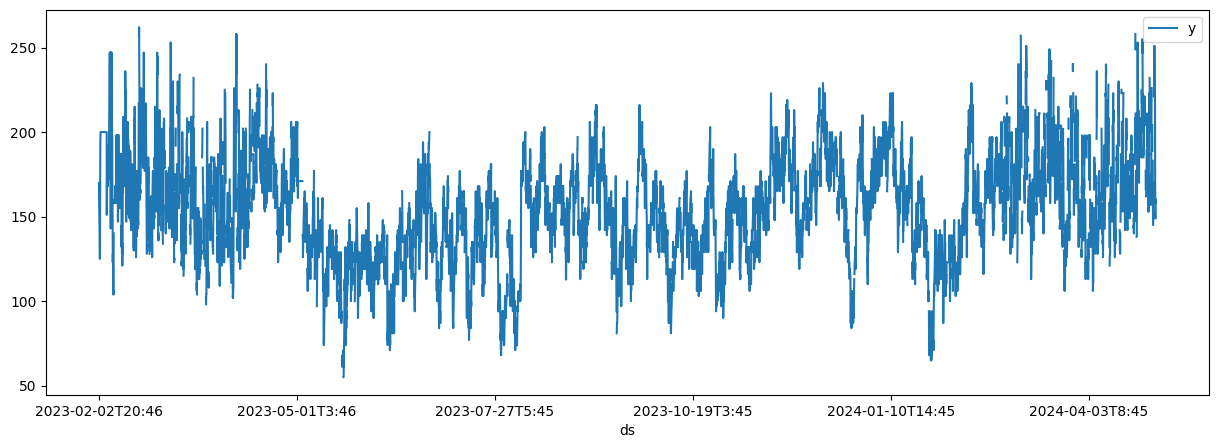

In [9]:
df_hospital.plot(x="ds", y="y", figsize=(15, 5))

In [10]:
## find duplicates
df_hospital.duplicated("ds").any()

False

In [36]:
## check duplicate rows
#df_hospital[df_hospital.duplicated("ds", keep=False)].tail(10)

In [37]:
## remove duplicates
# df_hospital.drop_duplicates(subset=['ds'], keep='first', inplace=True)

In [9]:
# remove duplicates
if df_hospital.duplicated("ds").any():
    df_hospital.drop_duplicates(subset=['ds'], keep='first', inplace=True)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-9-aa640444dd11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hospital.drop_duplicates(subset=['ds'], keep='first', inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hospital.drop_duplicates(subset=['ds'], keep='first', inplace=True)



In [11]:
# .. we set the confidence level to be 0.9.
# We define two quantiles, 0.05 and 0.95, which correspond to the 5th and 95th percentiles of the distribution of the forecast.
# The 90% confidence interval is then the difference between the 5th and 95th percentiles.

confidence_level = 0.9
boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

In [12]:
m = NeuralProphet(quantiles=quantiles)

In [23]:
# add holidays
# m = m.add_country_holidays('CA', subdiv='QC') # not working
# m = m.add_country_holidays('CA') # works but holiday for all canada

In [13]:
# add holidays (as event) from file

holidays = pd.read_csv("https://github.com/jlomako/prophet-bot/raw/main/data/quebec.csv")

df_events = pd.DataFrame({
    "event": "quebec_holidays",
    "ds": pd.to_datetime(holidays["ds"])
})

df_events.tail(5)

,event,ds
27,quebec_holidays,2024-06-24
28,quebec_holidays,2024-07-01
29,quebec_holidays,2024-09-02
30,quebec_holidays,2024-10-14
31,quebec_holidays,2024-12-25


In [14]:
# Add event holidays
m = m.add_events("quebec_holidays")

In [15]:
# Create DataFrame with events
df_all = m.create_df_with_events(df_hospital, df_events)

In [16]:
metrics = m.fit(df_all) # wait patiently...

Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [17]:
# Create a new dataframe reaching 24*7 into the future for forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df_all, n_historic_predictions=False, periods=24*7)

In [18]:
# Predict the future
forecast = m.predict(df_future)

Predicting: 155it [00:00, ?it/s]

In [19]:
forecast.tail(10)

,ds,y,yhat1,yhat1 5.0%,yhat1 95.0%,trend,season_weekly,season_daily,events_additive,event_quebec_holidays
158,2024-05-08 21:46:00,None,185.321335,161.575897,216.438980,178.177704,8.848397,-1.704756,0.0,0.0
159,2024-05-08 22:46:00,None,183.358154,159.385162,214.302765,178.185684,8.869837,-3.697368,0.0,0.0
160,2024-05-08 23:46:00,None,180.696182,157.074203,210.709503,178.193665,8.881813,-6.379292,0.0,0.0
161,2024-05-09 00:46:00,None,178.910873,156.542511,208.423569,178.201645,8.881239,-8.172002,0.0,0.0
162,2024-05-09 01:46:00,None,178.459839,157.108017,208.242508,178.209625,8.869670,-8.619449,0.0,0.0
163,2024-05-09 02:46:00,None,178.319565,157.285645,207.950653,178.217590,8.844270,-8.742309,0.0,0.0
164,2024-05-09 03:46:00,None,178.588333,157.930374,207.188873,178.225586,8.809424,-8.446687,0.0,0.0
165,2024-05-09 04:46:00,None,179.762405,159.623077,207.734741,178.233582,8.760673,-7.231847,0.0,0.0
166,2024-05-09 05:46:00,None,181.113266,160.649963,209.955597,178.241562,8.698731,-5.827020,0.0,0.0
167,2024-05-09 06:46:00,None,181.996338,160.393646,212.098206,178.249542,8.627007,-4.880207,0.0,0.0


In [20]:
forecast[['ds', 'yhat1', 'yhat1 5.0%', 'yhat1 95.0%']].tail(10)

,ds,yhat1,yhat1 5.0%,yhat1 95.0%
158,2024-05-08 21:46:00,185.321335,161.575897,216.438980
159,2024-05-08 22:46:00,183.358154,159.385162,214.302765
160,2024-05-08 23:46:00,180.696182,157.074203,210.709503
161,2024-05-09 00:46:00,178.910873,156.542511,208.423569
162,2024-05-09 01:46:00,178.459839,157.108017,208.242508
163,2024-05-09 02:46:00,178.319565,157.285645,207.950653
164,2024-05-09 03:46:00,178.588333,157.930374,207.188873
165,2024-05-09 04:46:00,179.762405,159.623077,207.734741
166,2024-05-09 05:46:00,181.113266,160.649963,209.955597
167,2024-05-09 06:46:00,181.996338,160.393646,212.098206


In [21]:
# Visualize forecast
m.plot(forecast)